In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [5]:
df.describe() # summary statistics of the dataset

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,154.000000,154.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,154.000000
mean,0.207792,41.246753,1.103896,1.509804,1.844156,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.454545
std,0.407051,12.593344,0.306121,0.501546,0.363891,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499554
min,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,0.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,0.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,0.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


# Data Preprocessing

# 1. Handle any missing values appropriately

In [6]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [7]:
columns_to_fill = df[['STEROID', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE',
                      'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE',
                      'SGOT','ALBUMIN', 'PROTIME']]
#print(columns_to_fill)

# Fill null values with the mean of each respective column
for column in columns_to_fill:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

In [8]:
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [9]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.000000,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1.000000,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2.000000,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,1.509804,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2.000000,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


# Scaling

# Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
columns_to_normalize = df.columns[1:]

In [13]:
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [14]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.618523,0.0
1,0,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.618523,0.0
2,0,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.618523,0.0
3,0,0.338028,0.0,0.509804,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.800000,0.0
4,0,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860,0.618523,0.0


# 2. Split the dataset 

In [15]:
x = df.drop('Class', axis = 1)
y = df[['Class']]

In [16]:
x.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.618523,0.0
1,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.618523,0.0
2,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.618523,0.0
3,0.338028,0.0,0.509804,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.800000,0.0
4,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860,0.618523,0.0


In [17]:
x.shape

(154, 19)

In [18]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [19]:
y.shape

(154, 1)

# Decision Tree Model

# 1. Split the dataset into training (70%) and testing sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .70)

In [22]:
x_train.shape

(107, 19)

In [23]:
x_test.shape

(47, 19)

In [24]:
y_test.shape

(47, 1)

In [25]:
y_train.shape

(107, 1)

In [26]:
x_train.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
43,0.690141,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.00,0.051948,0.167286,0.006309,0.534884,1.000000,0.0
116,0.605634,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.00,0.090909,0.420074,0.105678,0.418605,0.620000,1.0
50,0.450704,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.00,0.077922,0.219331,0.072555,0.441860,0.618523,0.0
27,0.718310,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.00,1.000000,1.00,0.142857,0.553903,0.064669,0.139535,0.360000,0.0
82,0.845070,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.8,0.66,0.866667,0.88,0.155844,0.568773,0.086751,0.186047,0.618523,0.0


In [27]:
x_test.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
17,0.464789,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.038961,0.133829,0.239748,0.441860,0.63,0.0
137,0.563380,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,0.0,0.090909,0.520446,0.025237,0.116279,0.31,1.0
12,0.478873,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.077922,0.204461,0.072555,0.418605,0.52,0.0
36,0.225352,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.0,1.0,1.0,0.129870,0.624535,0.214511,0.465116,0.90,0.0
140,0.661972,0.0,0.0,1.0,0.0,0.0,1.0,0.827586,0.583333,0.0,1.0,0.0,1.0,0.467532,0.349442,0.022082,0.325581,0.43,1.0


# 2.Building a Decision Tree classifier 

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

# 3. Train the model

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_tain = dt.predict(x_train) # training result
pred_tain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [32]:
y_train.head()

,Class
43,0
116,0
50,0
27,0
82,0


In [33]:
y_train['Predicted_tain_value'] = dt.predict(x_train)

In [34]:
y_train.head()

,Class,Predicted_tain_value
43,0,0
116,0,0
50,0,0
27,0,0
82,0,0


In [35]:
y_train.drop('Predicted_tain_value', axis = 1, inplace = True)

In [36]:
y_train.head()

,Class
43,0
116,0
50,0
27,0
82,0


In [37]:
dt.score(x_train, y_train)

1.0

# Model Evaluation

# 1. Make predictions on the testing set

In [38]:
pred_test = dt.predict(x_test)
pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [39]:
y_test.head()

,Class
17,0
137,1
12,0
36,0
140,1


In [40]:
y_test['predicted_test_value'] = dt.predict(x_test)

In [41]:
y_test.head()

,Class,predicted_test_value
17,0,0
137,1,0
12,0,0
36,0,0
140,1,1


In [42]:
y_test.drop('predicted_test_value', axis = 1, inplace = True)

In [43]:
y_test.head()

,Class
17,0
137,1
12,0
36,0
140,1


In [44]:
dt.score(x_test, y_test)

0.8297872340425532

# 2. Confusion Matrix

In [45]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay, roc_auc_score

In [46]:
accuracy_score(y_test, pred_test) # actual y and predicted y

0.8297872340425532

In [47]:
cm = confusion_matrix (y_test, pred_test)
cm

array([[31,  4],
       [ 4,  8]], dtype=int64)

<Axes: >

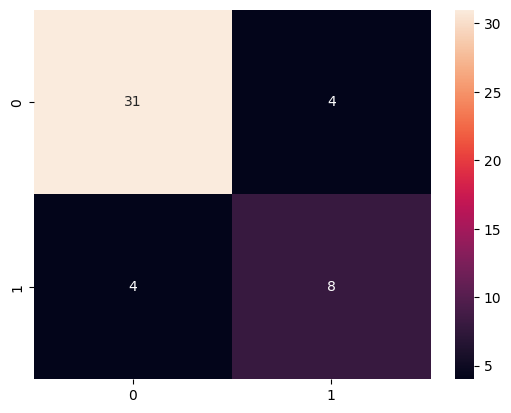

In [48]:
sns.heatmap(cm, annot=True)

# 3. Precision

In [49]:
precision_score(y_test, pred_test)

0.6666666666666666

# 4. Recall

In [50]:
recall_score (y_test, pred_test)

0.6666666666666666

# 5. f1_score

In [51]:
f1_score (y_test, pred_test)

0.6666666666666666

# 6. AUC_ROC

In [52]:
auc_roc = roc_auc_score(y_test, pred_test)

In [53]:
auc_roc

0.7761904761904761

In [54]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.67      0.67      0.67        12

    accuracy                           0.83        47
   macro avg       0.78      0.78      0.78        47
weighted avg       0.83      0.83      0.83        47



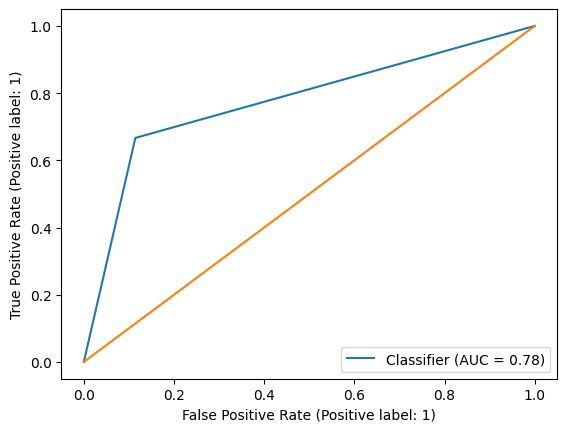

In [55]:
RocCurveDisplay.from_predictions(y_test, pred_test)
plt.plot([0,1], [0,1])
plt.show()

# Results and Analysis

# 1. Summarize the results obtained from the evaluation metrics.

Confusion Matrix: 
    
True Positive (TP): 31 whic is correctly identified.
True Negative (TN): 8 whic is also correctly identified.
False Positive (FP): 4 didn't get the expected answer and the answer is wrong.
False Negative (FN): 4 which is predicted false answer.

Precision (Positive Predictive Value): Precision is the ratio of correctly predicted positive observations to 
    the total predicted positives. Using this (TP / (TP + FP)) we can get Precision score.
    
Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to 
    the all observations in the actual class and the formula for Recall is = (TP / (TP + FN)).
    
F1 Score: The F1 score is the weighted average of precision and recall, where 1 is the best and 
    0 is the worst. It is calculated = 2 * (Precision * Recall) / (Precision + Recall).
    
AUC-ROC Score:

The AUC-ROC score represents the area under the Receiver Operating Characteristic (ROC) curve. 
It measures the ability of the model to distinguish between positive and negative cases.

# 2. Discuss the strengths and weaknesses of the Decision Tree model for this dataset.

Strengths of the Decision Tree Model

Decision Trees are interpretable and easy to understand, making them useful for providing insights into the factors influencing the predictions.Decision Trees can handle both numerical and categorical data without the need for extensive data preprocessing.They are non-parametric and can capture complex relationships in the data. Decision tree helps us for training and testing the dataset and also predict th values. To get good accuracy decission tree works quite fine. 

Weaknesses of the Decision Tree Model:

Prone to Overfitting: Decision Trees may overfit the training data, capturing noise in the dataset
and resulting in poor generalization to new data.

Instability: Small changes in the data can lead to different tree structures, impacting the model's stability.

Limited Expressiveness: A single decision tree may not capture highly complex relationships in 
the data compared to more advanced models.